# Polynomial Regression and Bias-Variance Tradeoff

#### Recap of Linear Regression using sklearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("datasets/advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Assumptions for Linear Regression
1) Linear Relationship: All fature variables should be somehow corelated with the output variable
2) Independence: All feature variables should not have any corelation with eachother
3) Homoscedasticity: The variance of the residuals (errors) of the regression line should be same for any values of independent variable of X
4) Normality: The residuals (errors) of the regression line are approximately normally distributed

#### Train Test Split

In [4]:
X = df.drop('sales', axis = 1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

160
40
160
40


#### Train Model on Training Dataset

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[ 0.04597903  0.18579595 -0.0030992 ]
3.0551216537620576


#### Evaluation of the Model

In [10]:
yPre = lr.predict(X_test)
error = y_test - yPre
print(error)

179    0.127337
166   -2.797131
187    0.182347
119   -0.250738
186    0.523071
134   -0.920164
142    0.855536
12    -1.266623
118    0.454900
178   -4.331399
138   -0.180801
43    -1.147050
194    0.766077
11     0.026475
44    -0.349956
101    0.685010
49     1.509119
4     -0.293733
149    0.259924
31     0.540625
188   -2.876221
116    0.167055
33    -1.582141
0      1.656481
181   -1.819920
161   -0.194229
2     -2.859220
183    2.154606
125    1.423384
81    -2.428296
176    0.175563
145    0.468901
124    0.321442
55     2.507281
153    0.809411
137   -0.024063
182    2.093866
156    0.001833
104    0.336298
106    1.043693
Name: sales, dtype: float64


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, yPre)
mse = mean_squared_error(y_test, yPre)
rmse = np.sqrt(mse)
r2Score = r2_score(y_test, yPre)
n = len(X_test)
m = 3
r2_adj = 1-((1-r2Score)*(n-1)/(n-m-1))
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2Score)
print("Adjusted R2 Score: ", r2_adj)

Mean Absolute Error:  1.0602981028984602
Mean Squared Error:  2.153313413453085
Root Mean Squared Error:  1.4674172594913435
R2 Score:  0.9175053931302267
Adjusted R2 Score:  0.9106308425577456


***Residual Plot*** It is a plot of residuals (predicted - actual) verses the predicted values. If the model is good fit, the residuals should be randomly distributed around a horizontal line at zero 

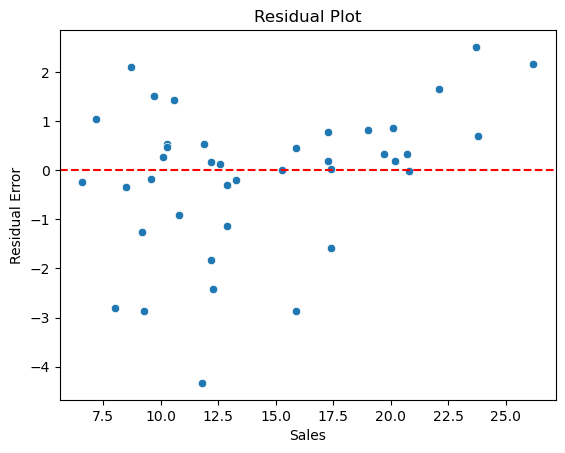

In [13]:
test_residuals = y_test - yPre
sns.scatterplot(x=y_test, y = test_residuals)
plt.title("Residual Plot")
plt.xlabel('Sales')
plt.ylabel('Residual Error')
plt.axhline(y = 0, color = 'r', ls = '--')
plt.show()

### Polynomial Regression
- Polynomial regression is a form of linear regression where due to non-linear relationships between dependent and independent variables, some polynomial terms are added to the linear regression to convert it into polynomial regression.
- Polynomial regression model estimates the relationship between independent variable X and independent variable Y as the nth degree polynomial in X.

#### Simple Polynomial Linear Regression
- In order to improve a linear regression model, we consider higher order relationship on the features
- There are two issues that a polynomial regression is going to address
   1) ***Higher Order Terms***: Will identify the non-linear relationship among the input features and output label
   2) ***Interaction Terms***: Will identify if there is a ***SYNERGY (Interaction)*** between multiple features (For example, newspaper advertising spend by itself is not effective, but greatly increases effectiveness if added to a TV advertising campaign)

#### Model Parameters vs Hyper Parameters
- A ML/DL model's parameters are the variables which a model learns at its own from the training dataset
   - m(slope), c(intercept) in linear regression
   - weights and biases in neural network
- A ML/DL model's hyper parameters are the configration variables that are explicitly defined by the engineer to control the learning process before the model start learning
- One cannot know the exact best value for hyperparameters for the given problem. The best value can be determined either by the rule of thumb or by trial and error
   - Learning rate in gradient descent
   - Number of iterations in gradient descent
   - Number of layers in neural network
   - Number of neurons per layer in a neural netwrok
   - Number of clusters in k means clustering

### Bias-Variance Tradeoff
- ***Overfit Model***
- This situation occurs when the model is too complex and fits in the training data too closely, resulting in poor generalization to new model. 
- Can be caused by high variance and high bias
- A model with high variance is sensitive to small fluctuations in the training data and may fit the training data too closely, leading to poor performance on new data. A model with high bias is unable to fit the training data well and may perform poorly on both the training and test sets
- ***Underfit Model***
- Occurs when the model is too simple and cannot capture the underlying pattern in the data, resulting in poor performance on both the training and testing data.
- Underfitting can be caused by high bias and low variance. A model with high bias is unable to fit the taining data well & may perform poorly on both the training and test data.
- ***Bias***
- The inablility of a ML model to capture the relationship between the input features and output labels
- Bias is simplifying assumptions made by the model to make the target function easier to approximate. Bias is related to the training set error and it is also related to the underfitting
- ***Variance***
- It is related to the test set error (How big is the test set error compared to the train set error) and it is also related to the overfitting
- ***Bias-Variance Tradeoff***
- Decresing bias will increase variance and decresing variacne will increase bias. So, we need to find sweet spot where our machine learning model performs between the errors introduced by the bias and the variance
- Adjusting bias and variance to find sweak spot is called bias-variance tradeoff. 

#### How to prevent overfitting in Supervised ML
1) Remove correlated features from your dataset (feature selection, Forward/Backward Selection)
2) Cross-validation(k-flod, stratified k-fold, hold-out, leave-p-out)
3) Early stoping
4) Regularization (L1, L2, L1+L2)
5) Hyperparameter tuning (RandomizedSearchCV, GridSearchCV)
6) Ensembling Techniques (Bagging and Boosting)

## Example # 01

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("datasets/advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [2]:
X = df.drop('sales', axis=1)
y = df['sales']

In [8]:
# Create polynomial Features
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
pl.fit(X)
poly_features = pl.transform(X)

In [11]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features , y, test_size = 0.2)

In [12]:
# Train Linear Regression model on training dataset with polynomial Features
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)

LinearRegression()

In [13]:
# Evaluation of the Linear Model
y_predicted = poly_model.predict(X_test)
test_residuals = y_test - y_predicted

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predicted)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

RMSE:  0.6216312690488903
R2 Score:  0.9865222889356824


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("datasets/advertising4D.csv")
X = df.drop('sales', axis=1)
y = df['sales']
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,6):
 # Create poly data set for degree d=1,2,3,4,5 in each loop iteration
 polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
 poly_features = polynomial_converter.fit_transform(X)
 
 # Split this new poly data set
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2)
 
 # Create LR model and train it on new polynomial feature set
 model = LinearRegression()
 model.fit(X_train,y_train)
 
 # Predict on both train and test data
 train_pred = model.predict(X_train)
 test_pred = model.predict(X_test)
 
 # Compute Errors on Train and Test Set and append to lists
 train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
 test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
 train_rmse_errors.append(train_RMSE)
 test_rmse_errors.append(test_RMSE)

In [16]:
train_rmse_errors

[1.6491513562544886,
 0.6402563504701595,
 0.4685541988119156,
 0.292556571712521,
 0.2597456745131378]

In [17]:
test_rmse_errors


[1.7630994619022935,
 0.4422568601831687,
 0.5099478811382908,
 0.7790495594434296,
 0.5603580481343817]

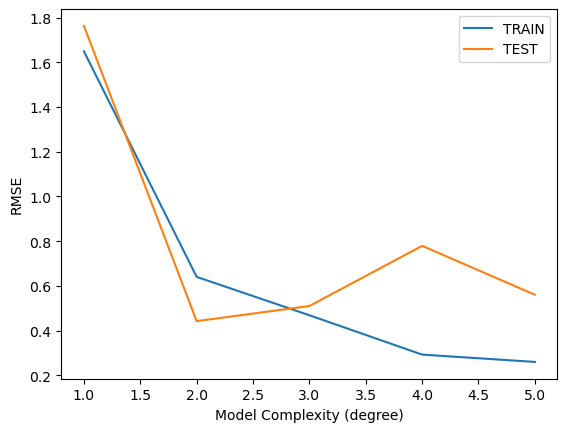

In [18]:
plt.plot(range(1,6),train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),test_rmse_errors,label='TEST')
plt.xlabel("Model Complexity (degree)")
plt.ylabel("RMSE")
plt.legend();